In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\yoges\OneDrive\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
data.shape

(1470, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

As we can see there are many columns which has object type value so we gonna encode it so we can make multiple graphs (EDA) so that we can understand the better 

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

we have 0 null values so we dont need to treat any 

In [8]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Many of the columns have binary values in same time many have continous data 

In [9]:
data.drop(["EmployeeCount", "EmployeeNumber", "Over18", 
        "StandardHours"], axis=1, inplace=True)
#removed EmployeeCount,Over18,StandardHours as its value is 1 
#EmployeeNumber is just data of employee it doesnt effect much as it depends upon department to department 

In [10]:
#lets check the shape 
data.shape

(1470, 31)

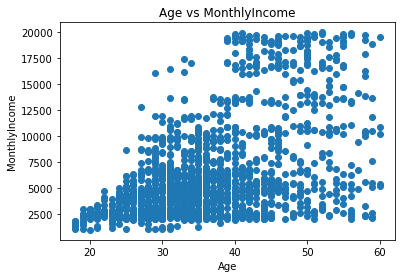

In [11]:
plt.scatter(data.Age,data.MonthlyIncome)
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.title('Age vs MonthlyIncome')
plt.show()

checking relation between age and monthly income even though as the age increases mothly icome increases bit will still keep these as there are some employess whos age is more but salery is of 20-30 years people range we would have left it if there were few data but looks huge data so will keep it 

# so lets check object type data using countplot

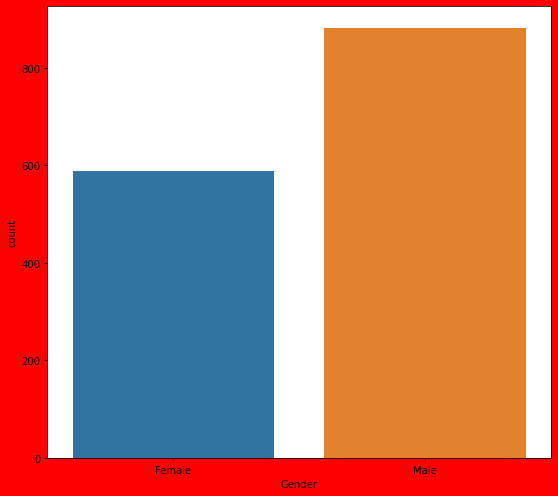

In [12]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Gender']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Gender'])
    plotnumber += 1
plt.tight_layout()

More number of males as compare to females

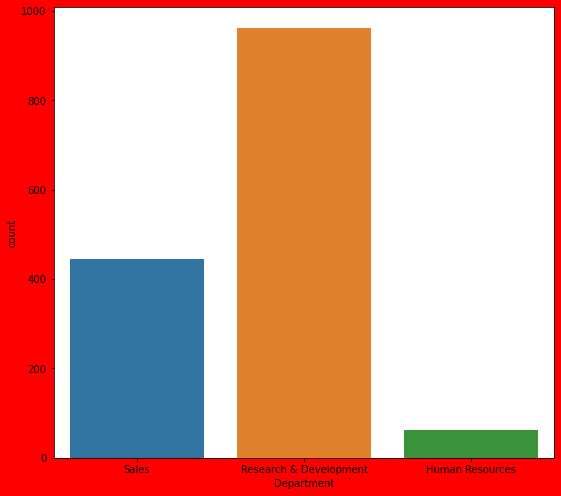

In [13]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Department'])
    plotnumber += 1
plt.tight_layout()

more number of employes found in  Research and Development Department as compare to Sales & HR

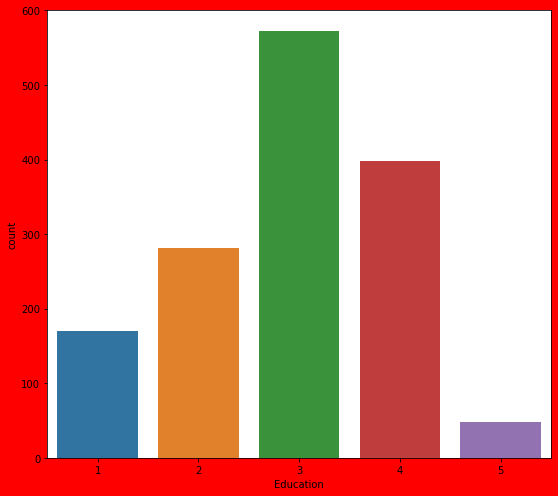

In [14]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Education'])
    plotnumber += 1
plt.tight_layout()

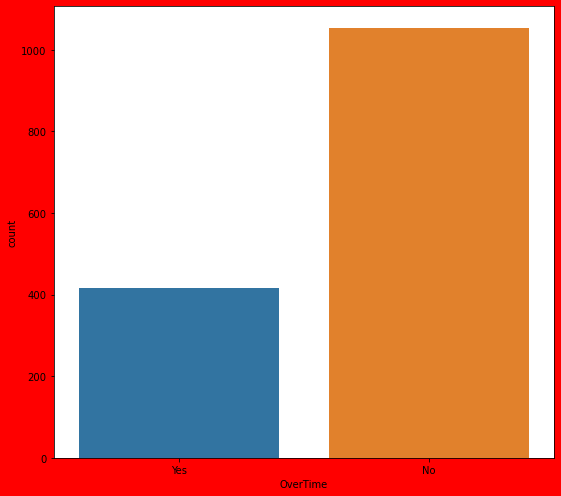

In [15]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['OverTime'])
    plotnumber += 1
plt.tight_layout()

few people are in overtime

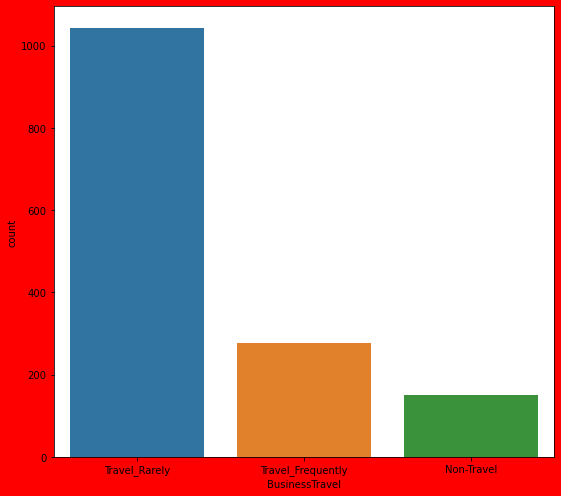

In [16]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['BusinessTravel'])
    plotnumber += 1
plt.tight_layout()

less number of trvael are seen  

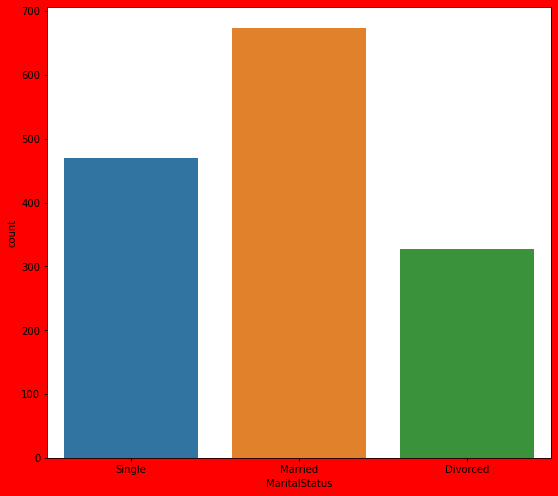

In [17]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['MaritalStatus'])
    plotnumber += 1
plt.tight_layout()

More married employees as compared to single & devorced 

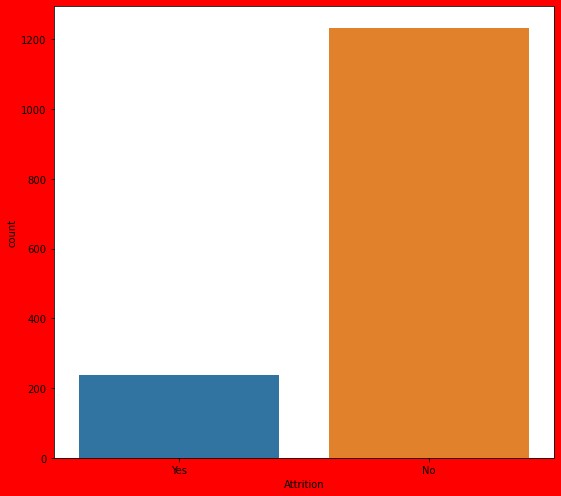

In [18]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Attrition'])
    plotnumber += 1
plt.tight_layout()

Attriation has low Yes 

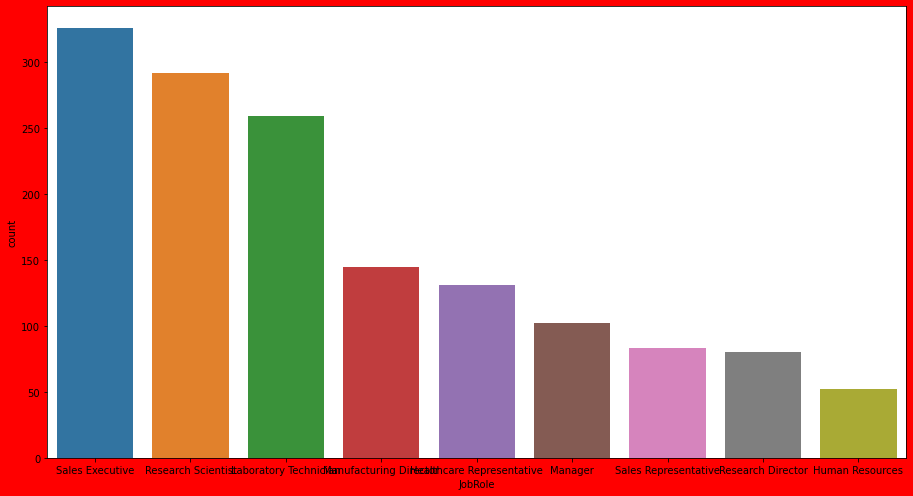

In [19]:
plt.figure(figsize = (25,7), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['JobRole'])
    plotnumber += 1
plt.tight_layout()

we can see here Sales Executive,Research Scientist,Laboratory Technician are top 3 job roles with range of 240-300 in each role 

 Now lets all the objec type data to integer as our models understand numbers  only so by usig OrdinalEncoder we can provide a unique number for the data

In [20]:
from sklearn.preprocessing import OrdinalEncoder

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [22]:
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
ord_enc=OrdinalEncoder(categories=[['Yes','No']])
df1=ord_enc.fit_transform(data[['Attrition']])
df1

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [24]:
data['Attrition']=df1

In [25]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [26]:
ord_enc=OrdinalEncoder(categories=[['Travel_Rarely','Travel_Frequently','Non-Travel']])
df1=ord_enc.fit_transform(data[['BusinessTravel']])
print(df1)
data['BusinessTravel']=df1

[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


In [27]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [28]:
ord_enc=OrdinalEncoder(categories=[['Sales', 'Research & Development', 'Human Resources']])
df1=ord_enc.fit_transform(data[['Department']])
print(df1)
data['Department']=df1

[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [29]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [30]:
ord_enc=OrdinalEncoder(categories=[['Life Sciences', 'Other', 'Medical', 'Marketing','Technical Degree', 'Human Resources']])
df1=ord_enc.fit_transform(data[['EducationField']])
print(df1)
data['EducationField']=df1

[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [2.]
 [2.]]


In [31]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [32]:
ord_enc=OrdinalEncoder(categories=[['Female', 'Male']])
df1=ord_enc.fit_transform(data[['Gender']])
print(df1)
data['Gender']=df1

[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [33]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [34]:
ord_enc=OrdinalEncoder(categories=[['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources']])
df1=ord_enc.fit_transform(data[['JobRole']])
print(df1)
data['JobRole']=df1

[[0.]
 [1.]
 [2.]
 ...
 [3.]
 [0.]
 [2.]]


In [35]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [36]:
ord_enc=OrdinalEncoder(categories=[['Single', 'Married', 'Divorced']])
df1=ord_enc.fit_transform(data[['MaritalStatus']])
print(df1)
data['MaritalStatus']=df1

[[0.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [37]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
ord_enc=OrdinalEncoder(categories=[['Yes', 'No']])
df1=ord_enc.fit_transform(data[['OverTime']])
print(df1)
data['OverTime']=df1

[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]


we have treated all the object data now lets check

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   float64
 14  JobSatis

<Figure size 360x720 with 0 Axes>

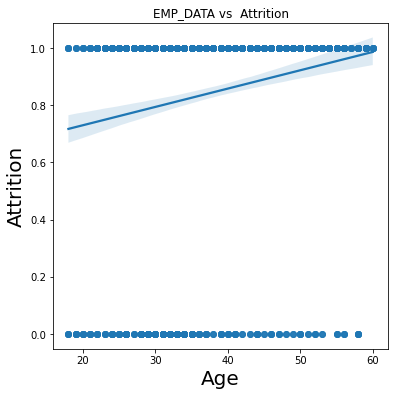

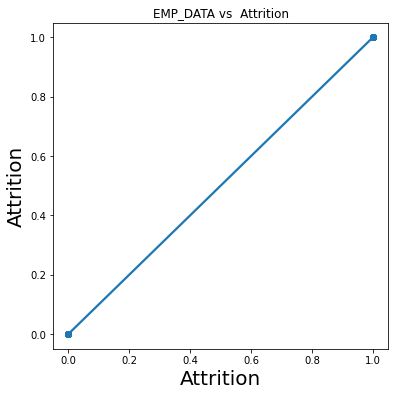

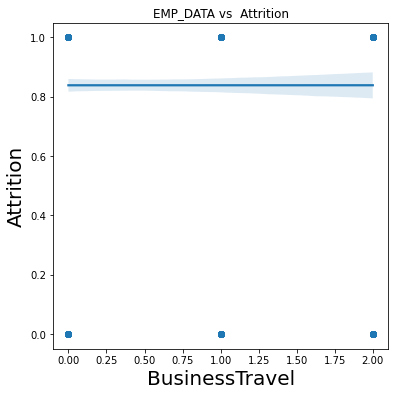

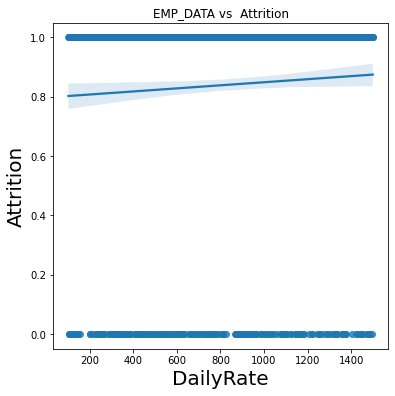

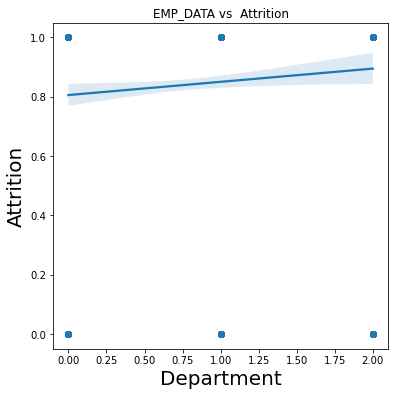

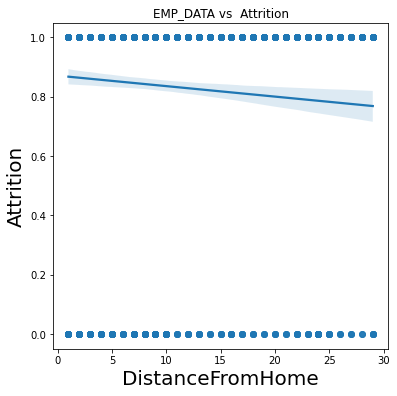

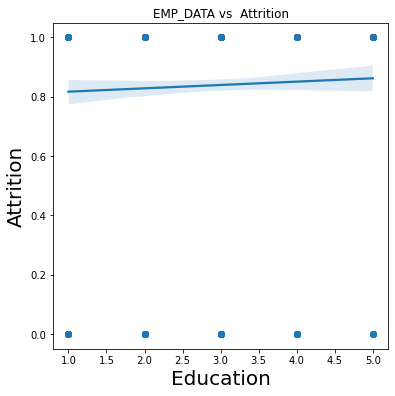

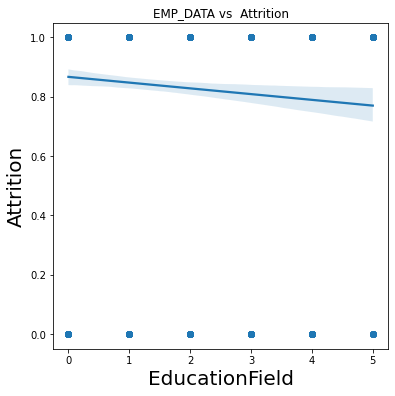

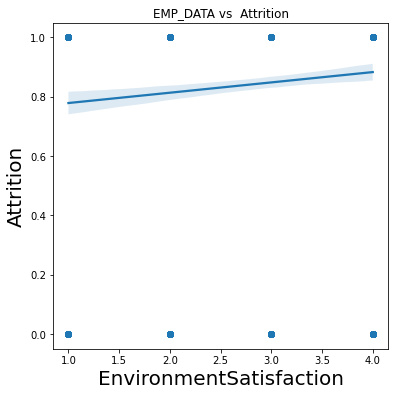

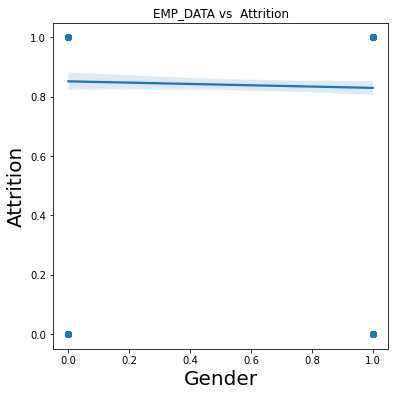

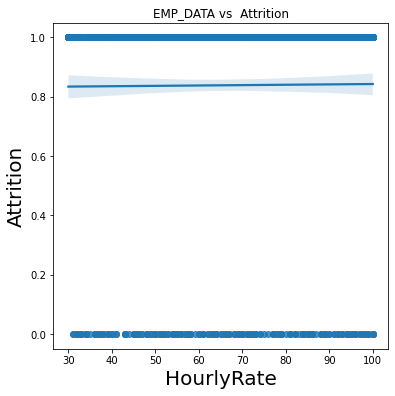

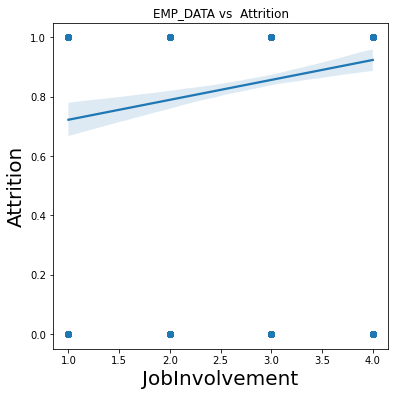

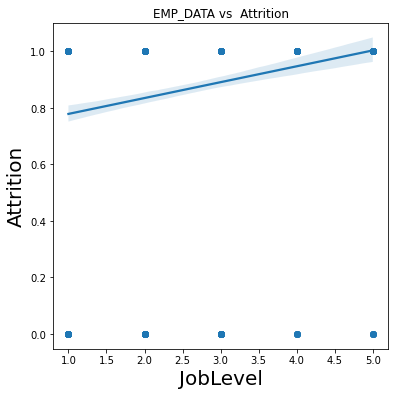

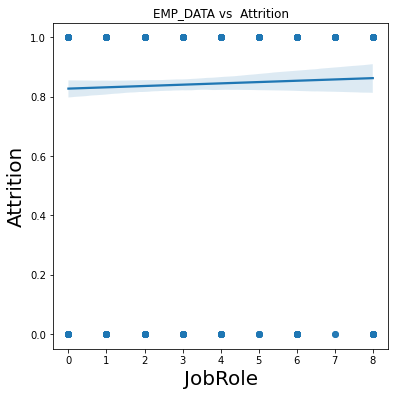

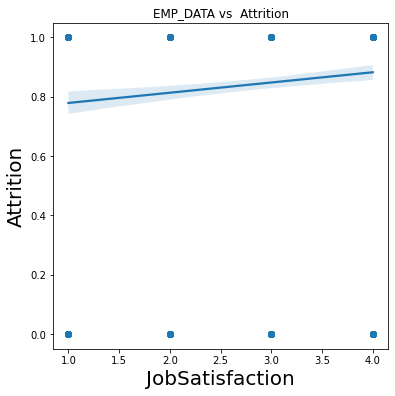

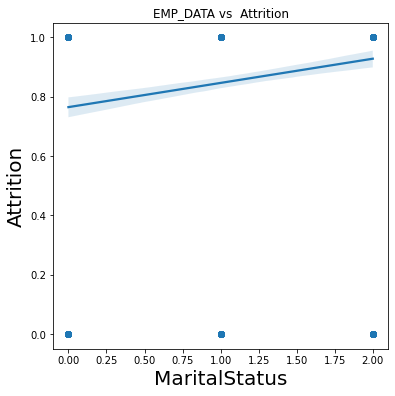

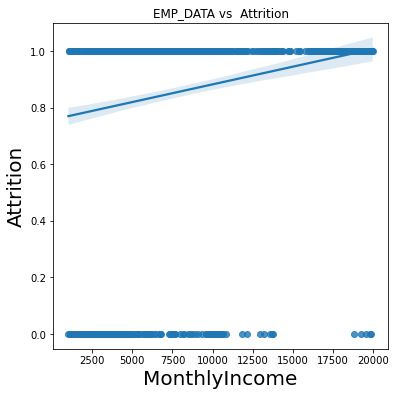

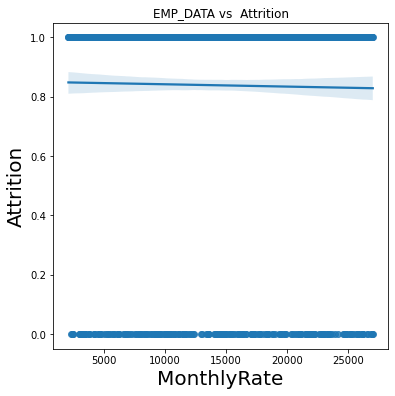

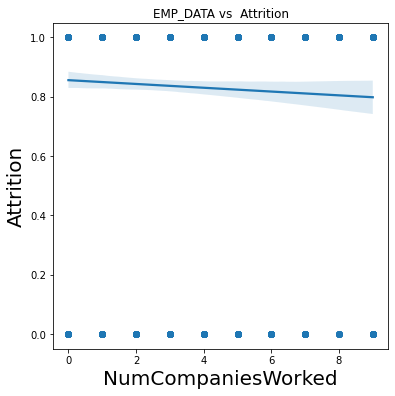

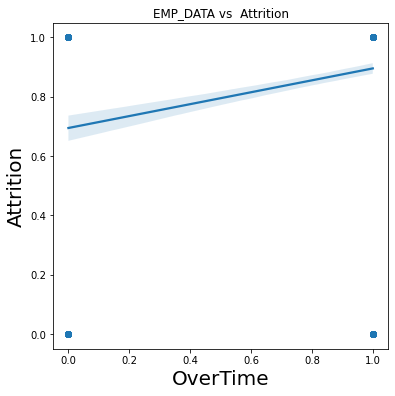

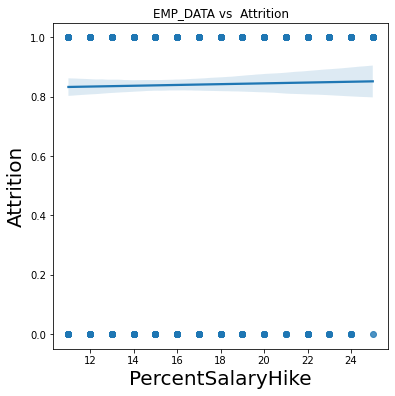

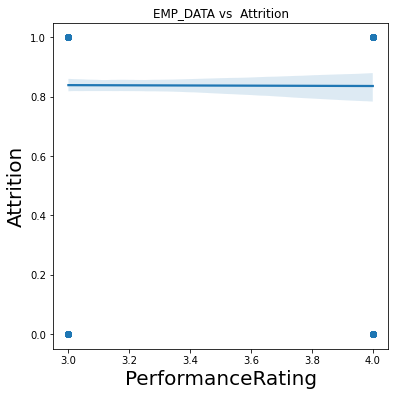

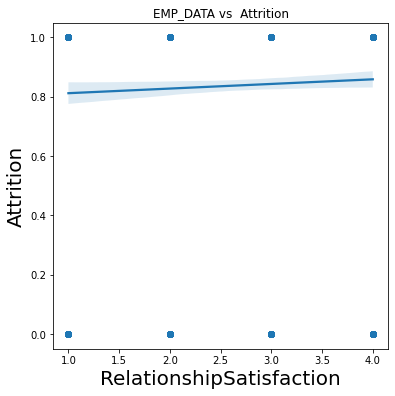

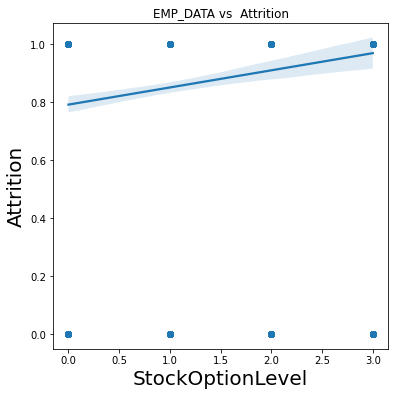

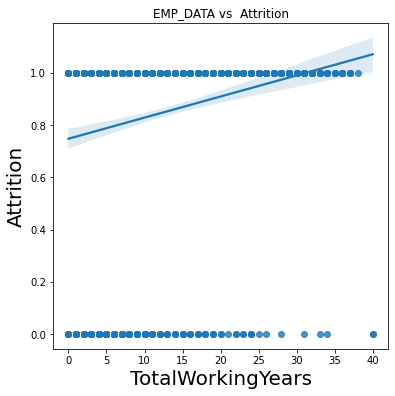

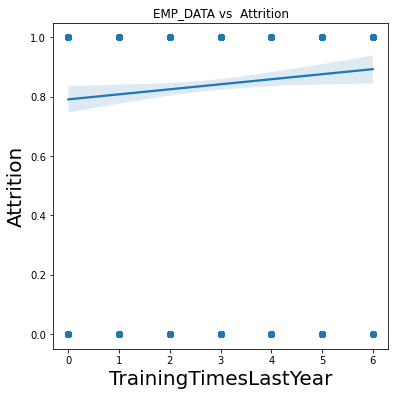

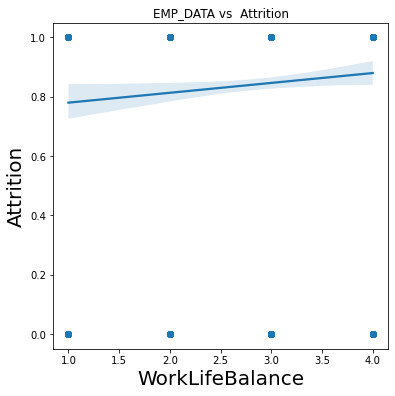

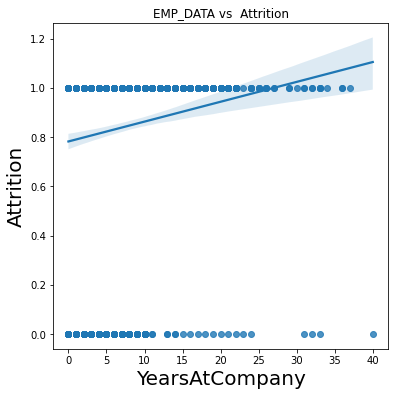

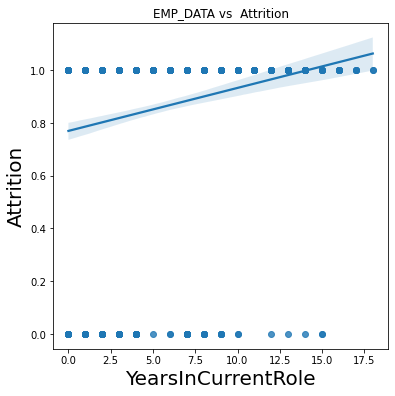

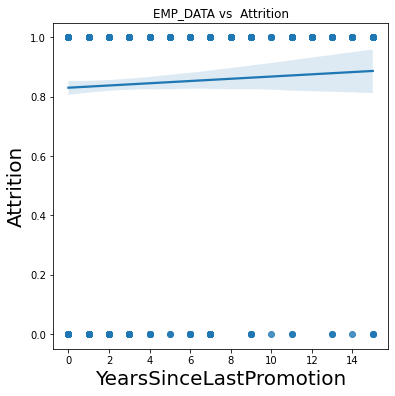

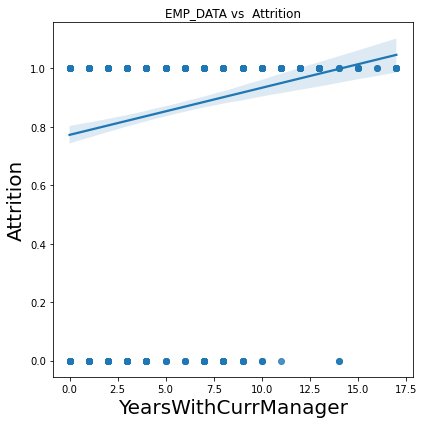

In [40]:
plt.figure(figsize = (5,10), facecolor = 'blue')
plotnumber = 1

for column in data:
    if plotnumber <=30:
        plt.figure(figsize = (6,6))
        sns.regplot(data[column], data['Attrition'])
        plt.title('EMP_DATA vs  Attrition')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
        
plt.tight_layout()

we dont see much similarites lets plot other plots

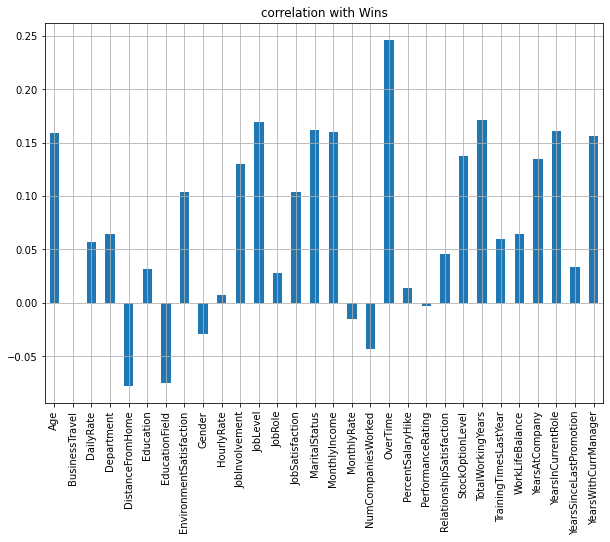

In [41]:
data.drop('Attrition',axis=1).corrwith(data.Attrition).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with Wins')
plt.show()

we can see many features are on same level can be corelated 

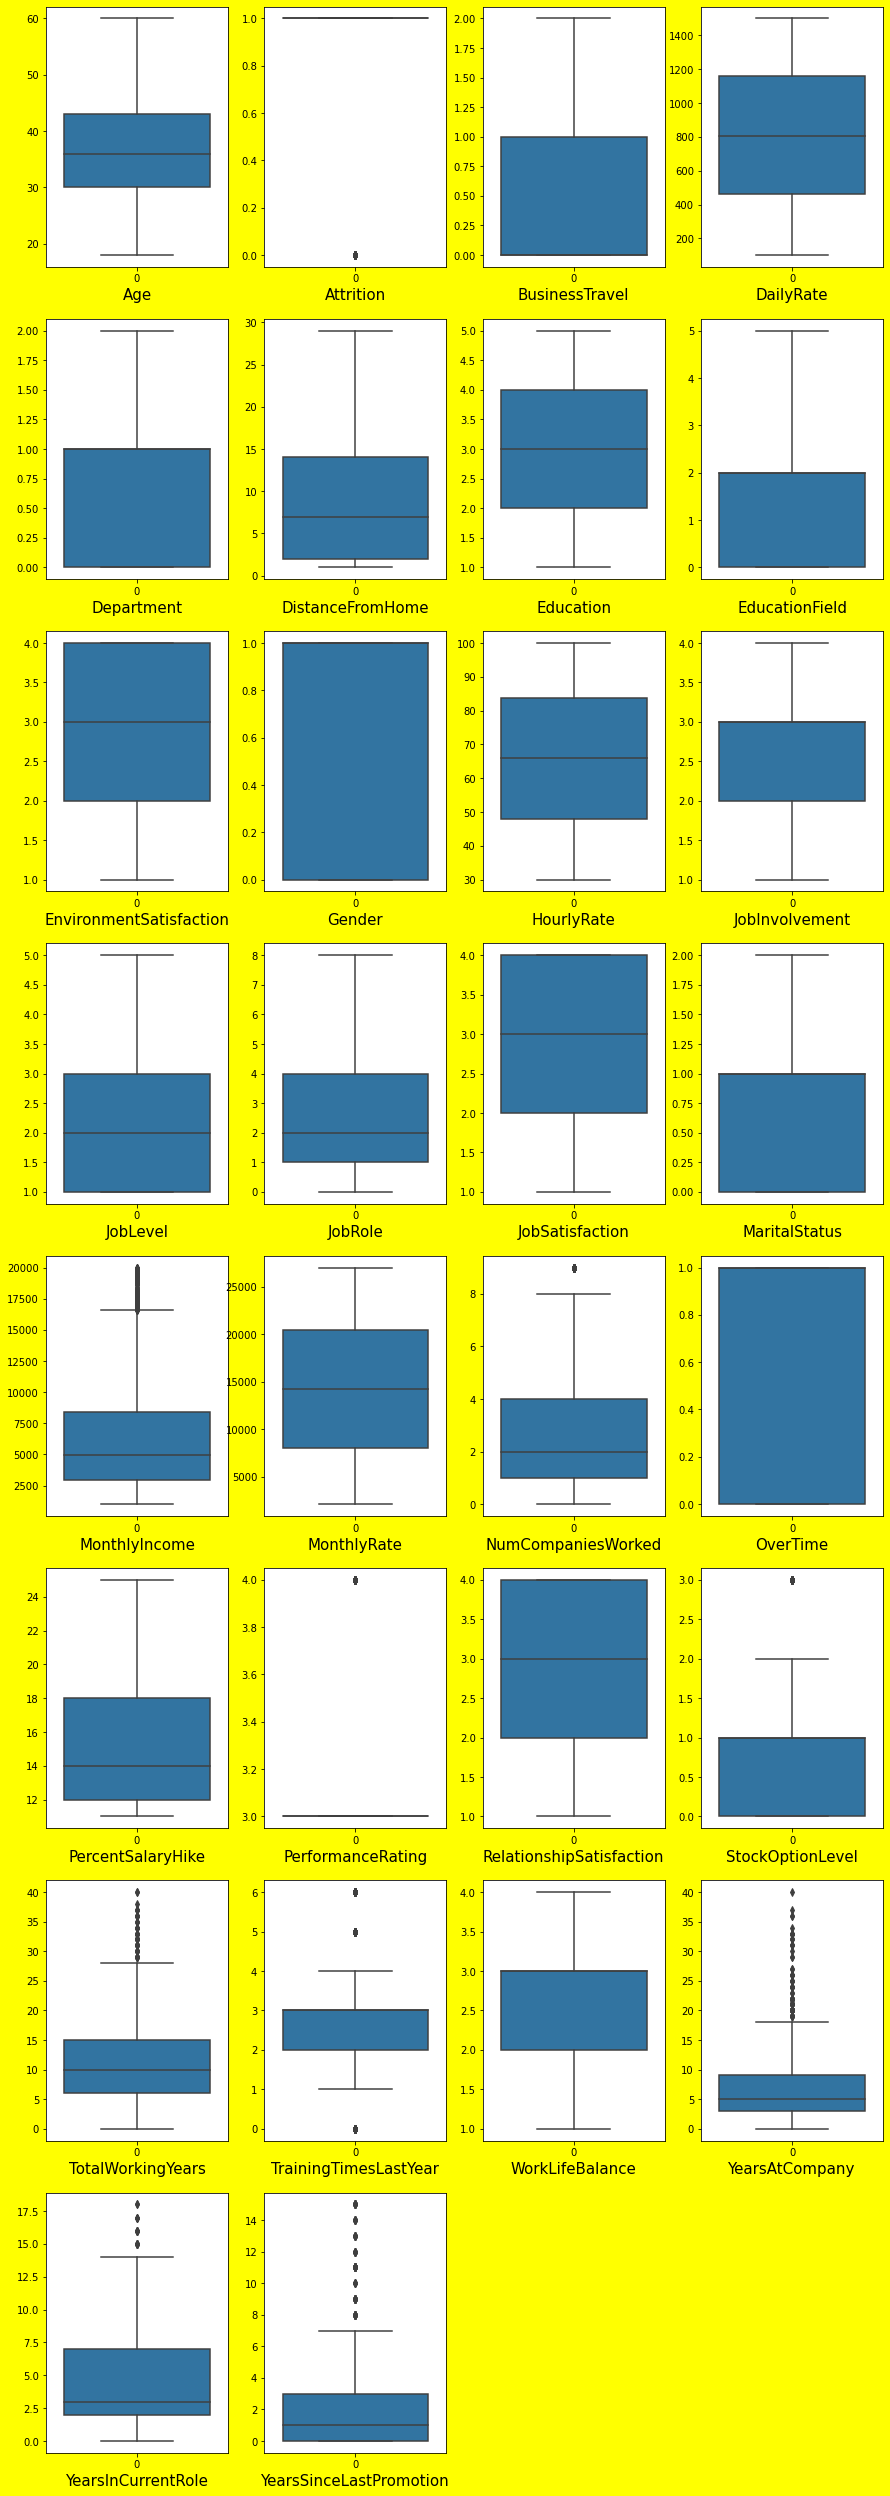

In [42]:
plt.figure(figsize=(15,45),facecolor='yellow')
graph=1
for column in data:
    if graph<=30:
        plt.subplot(8,4,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

features which have outliers are in continous so we can ignore it as same  salery , promotions , roles is not given to everyone 

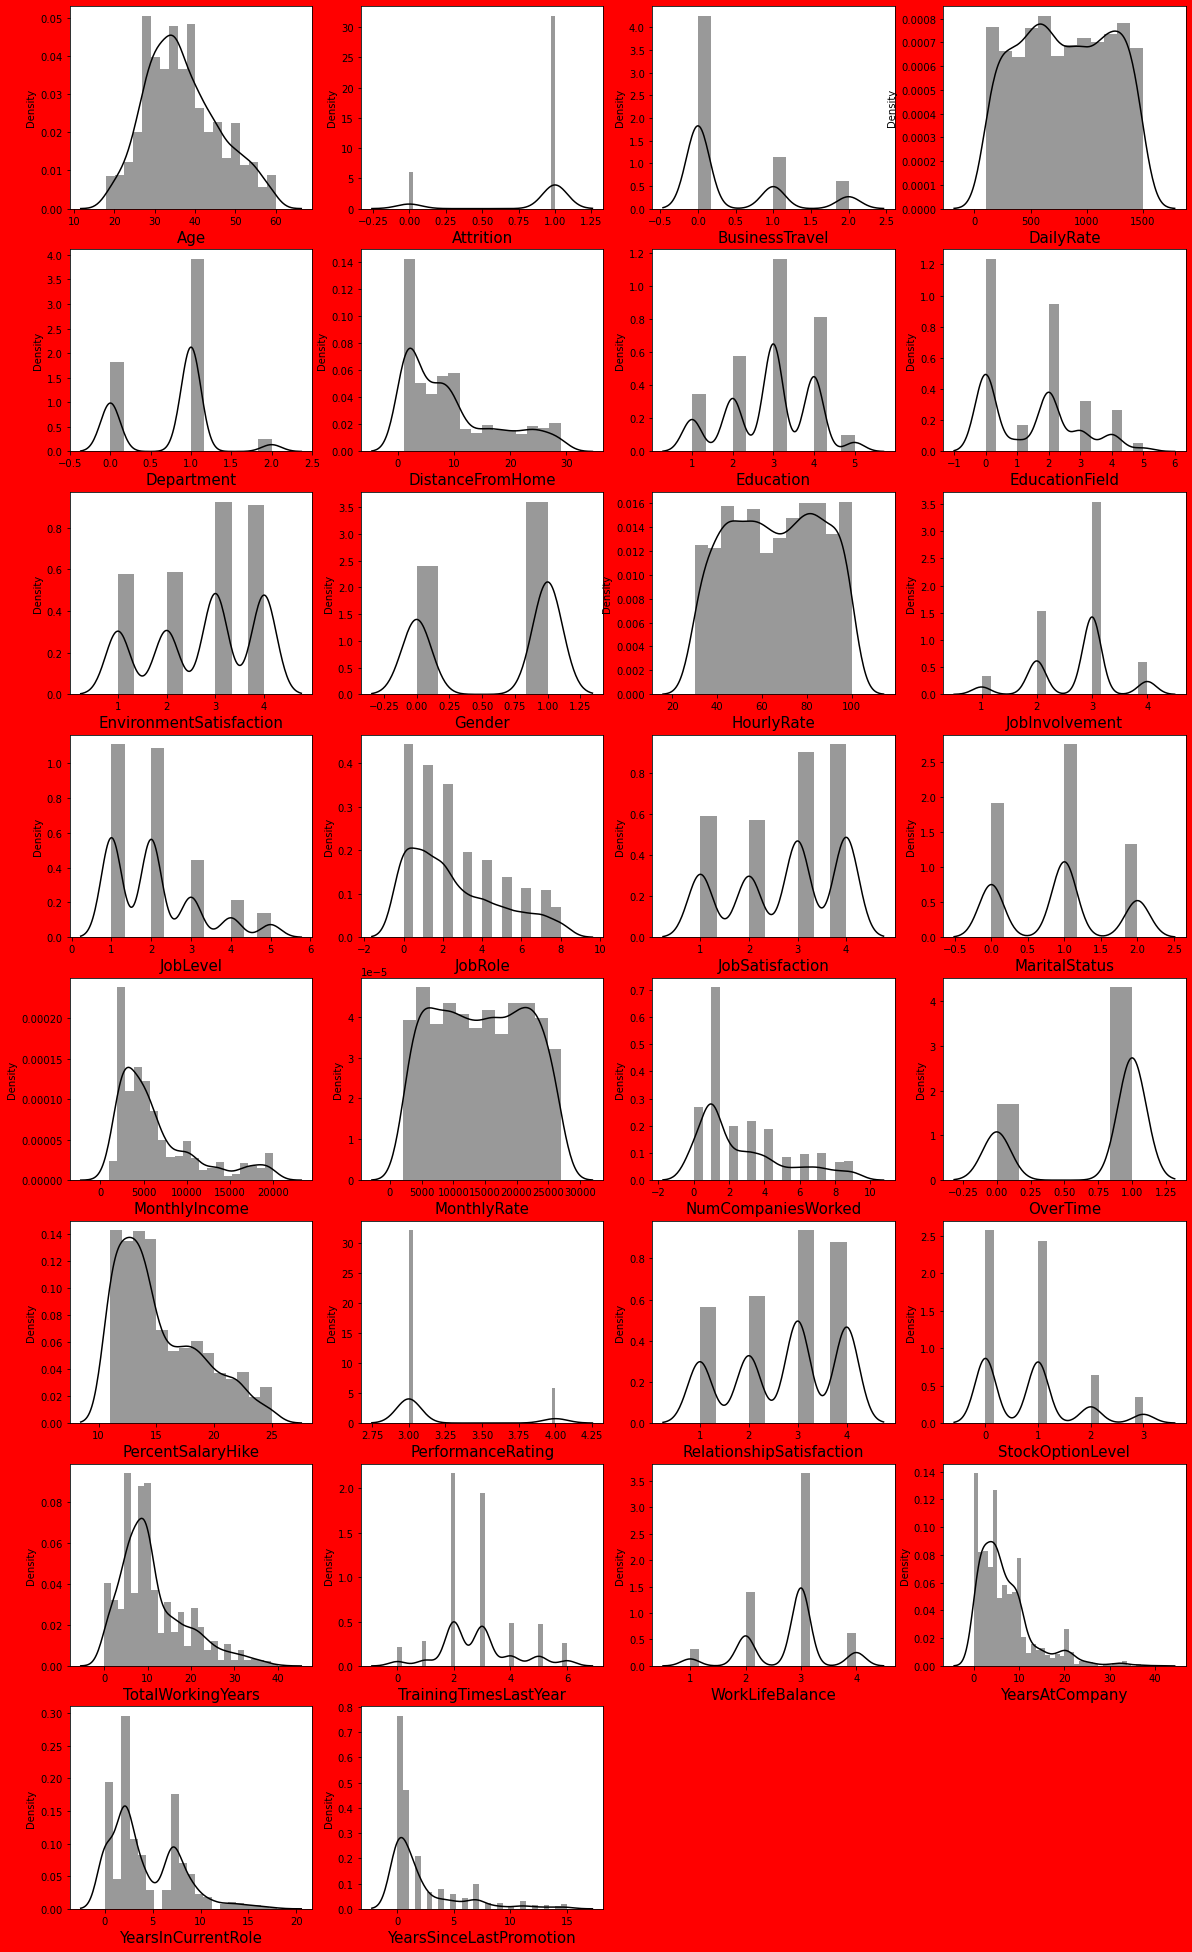

In [43]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=30:
        ax = plt.subplot(8,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

# SKWENESS CHECK NOt PERFORMED 

# Skweness check is not performed as there are payments columns, experience column and many which comes under outliers and skwenss  and employee activites  differ from one Employee to  another employee ... for clarification i tried to perform skweness but ended up loosing monthly income feature with 0 accuracy i have left 277 row of heat map in the end for better clarification 

Cleaning the Data

#data.shape

Z Distrubution

1 standard deviation covers 99.7%

2 standard deviation covers 95.4%

3 standard deviation covers 68.3% (best SD)

#from scipy.stats import zscore
z_score= zscore(data)
abs_z_score=np.abs(z_score) #apply he formula and get the scaled data 

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

#data

#data.shape

#so we lost 83 rows which is less than 7 % 

#plt.figure(figsize=(15,45),facecolor='yellow')
graph=1
for column in data:
    if graph<=30:
        plt.subplot(8,4,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

# Skewness Check

#Checking for Skewness
data.skew()

# Skewness:
    lets check the skwenss and decrese it by using Power transformer method 

from sklearn.preprocessing import PowerTransformer

scalerd=PowerTransformer(method='yeo-johnson')

data[['BusinessTravel','DistanceFromHome','JobLevel','JobRole','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']] = scalerd.fit_transform(data[['BusinessTravel','DistanceFromHome','JobLevel','JobRole','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].values)

#data['MonthlyIncome']=np.log(data['MonthlyIncome'])

#we are not including MonthlyIncome in Z-skwed method as we are getting value as 0 so we are performing here it self >

data.skew()

plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=30:
        ax = plt.subplot(8,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

# Lets check VIF Score

In [44]:
scaler=StandardScaler()
X=data.drop('Attrition',axis=1)

In [45]:
x = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [46]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,2.053560,Age
1,1.016146,BusinessTravel
2,1.022135,DailyRate
3,1.386331,Department
4,1.018119,DistanceFromHome
5,1.064097,Education
6,1.019808,EducationField
7,1.016306,EnvironmentSatisfaction
8,1.019996,Gender
9,1.020889,HourlyRate


In [47]:
scaler=StandardScaler()
X=data.drop('Attrition',axis=1)
X_scaled=scaler.fit_transform(X)

In [48]:
from sklearn.model_selection import KFold,cross_val_score

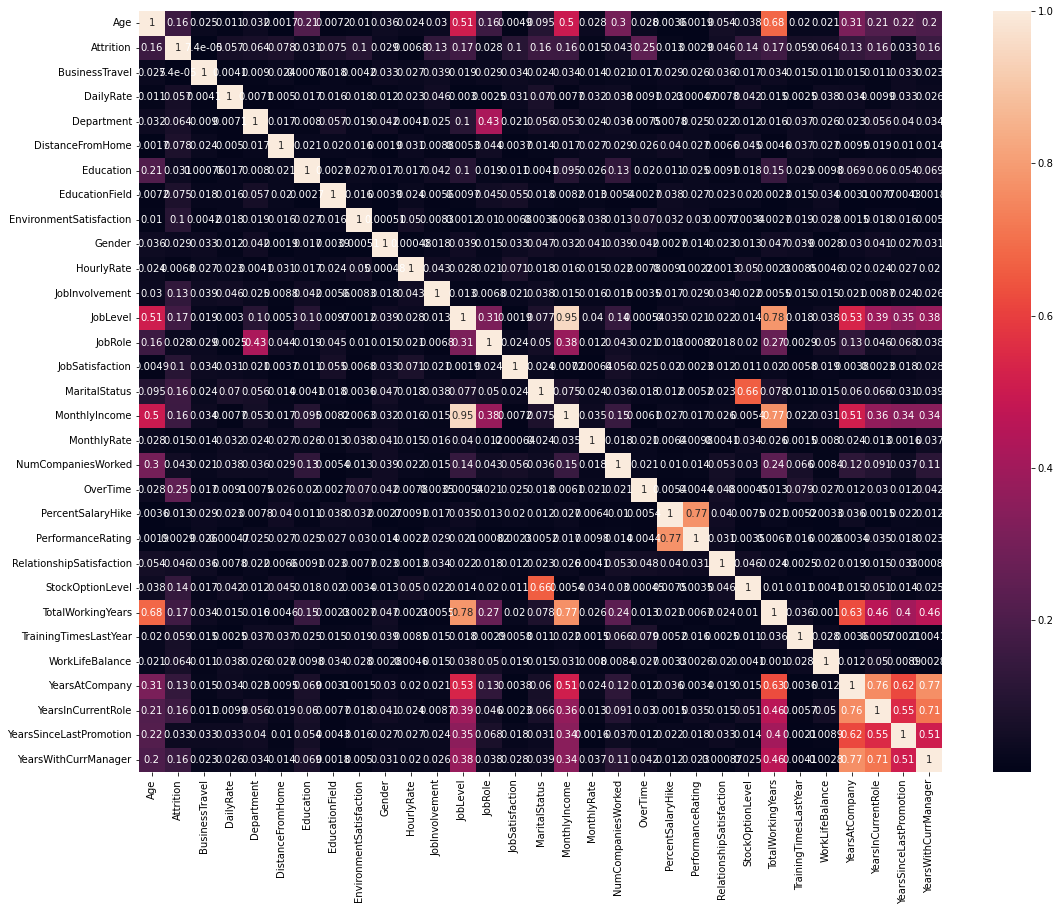

In [49]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

# As there are many feature we gonna use PCA 

# PCA

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[-0.51932823,  0.68865085, -1.04047927, ..., -0.44557763,
        -0.6244206 ,  0.01249741],
       [ 0.48216585, -1.68401392,  2.86748879, ..., -0.56531901,
        -0.42768793,  0.09411475],
       [-2.51776124,  1.19955038, -0.18658526, ...,  0.08264259,
        -0.01468155,  0.05667641],
       ...,
       [-1.22181905, -0.47947675,  2.54437275, ...,  0.06853227,
        -0.30392014,  0.09048494],
       [ 0.81452167, -0.55241873, -0.95298886, ..., -0.13813545,
         0.33329775,  0.01641957],
       [-1.22657199,  0.24510182, -0.92567129, ..., -0.22904149,
        -0.21385153,  0.2832426 ]])

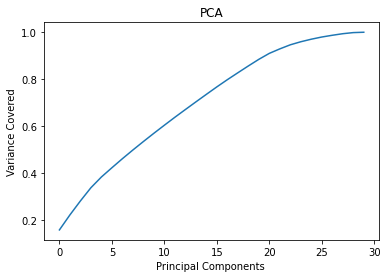

In [52]:
#lets plot scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))#cumsum=cummulative summention
plt.xlabel('Principal Components ')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()
#explained_variance_ratio_ = how much data variance u can explain if ur using on component 
#cumsum = it will increase its value by adding one + another data then another and so on 

In [53]:
pca=PCA(n_components=27)
new_pcomp=pca.fit_transform(X_scaled)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,-0.519328,0.688651,-1.040479,-1.247294,-2.555002,-0.137701,-2.290714,-0.772895,3.084869,0.922712,...,0.592750,0.723575,1.002002,1.319456,0.474145,-0.902351,0.492875,0.144524,-0.146045,-0.452623
1,0.482166,-1.684014,2.867489,-0.288486,0.546124,1.048989,0.185058,0.269191,-1.247538,0.554115,...,-0.729521,0.031528,0.240651,0.281934,-1.978866,-0.273851,0.202130,0.237613,0.166254,0.011296
2,-2.517761,1.199550,-0.186585,-1.134747,0.019909,0.002573,-0.850781,-0.091347,0.956004,-1.568635,...,0.588298,0.167367,-0.186210,1.659986,0.114614,0.130585,0.058218,0.221245,-0.118955,0.228466
3,-0.948549,-0.431449,-1.298085,-0.242355,-0.149801,1.011020,-1.562792,0.327343,0.837153,-0.812583,...,0.763061,0.144327,-1.296587,-0.384933,-0.069115,0.496549,-0.326797,-0.822249,1.192660,-0.490716
4,-1.906770,1.020979,-0.788616,0.153047,0.634928,-0.290933,0.794488,-0.002343,-0.972553,-0.738758,...,-1.957382,0.420176,0.039480,2.230370,0.973877,-0.373559,-0.404282,0.101389,-0.021225,-0.258881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.779982,0.444259,0.292498,0.481275,0.152249,0.268617,-0.811354,-0.657844,-1.169229,-0.542510,...,-0.590354,-0.937308,1.021444,1.196872,-0.498780,-0.193671,-0.276733,0.112137,-0.281649,0.432623
1466,0.917367,0.151738,-0.300388,0.055165,1.461512,1.432702,2.261445,0.478878,0.591517,0.167293,...,-0.371228,-0.796882,-0.550913,1.286891,-0.246803,-0.894988,0.059652,0.271532,0.122409,0.434274
1467,-1.221819,-0.479477,2.544373,0.118415,0.624967,-1.401779,-1.397139,0.832815,0.108450,0.438177,...,0.570956,-1.410600,0.079663,-0.536074,0.506753,-0.304417,-0.492391,0.031046,-0.099753,-0.673899
1468,0.814522,-0.552419,-0.952989,-0.367954,-1.365529,0.312569,-0.268393,-0.362975,-0.917632,-1.205103,...,0.361333,0.184961,-0.111256,-0.816548,-1.658472,-0.643342,0.823720,-0.565615,-0.249160,0.042694


In [54]:
y=data['Attrition']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [61]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n===============Train Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        
        print('\n===============Test Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [63]:
from sklearn.svm import SVC
svc=SVC()
#svc model training and printing train and test score 
svc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :91.56%

===============Test Reasult=============
Accuracy SCore :86.14%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      0.16      0.28        61
         1.0       0.86      1.00      0.92       307

    accuracy                           0.86       368
   macro avg       0.93      0.58      0.60       368
weighted avg       0.88      0.86      0.82       368



In [64]:
SVC_CVS=cross_val_score(svc,X_scaled,y,cv=10).mean()
SVC_CVS

0.8564625850340135

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()
#gbdt model training and printing train and test score 
gbdt.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :97.82%

===============Test Reasult=============
Accuracy SCore :84.51%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.58      0.25      0.34        61
         1.0       0.87      0.96      0.91       307

    accuracy                           0.85       368
   macro avg       0.72      0.61      0.63       368
weighted avg       0.82      0.85      0.82       368



In [66]:
gbdt_csv=cross_val_score(gbdt,X_scaled,y,cv=10).mean()
gbdt_csv

0.8653061224489795

In [108]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#lr model training and printing train and test score 
lr.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :88.20%

===============Test Reasult=============
Accuracy SCore :85.87%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.70      0.26      0.38        61
         1.0       0.87      0.98      0.92       307

    accuracy                           0.86       368
   macro avg       0.78      0.62      0.65       368
weighted avg       0.84      0.86      0.83       368



In [109]:
lr_CSV=cross_val_score(lr,X_scaled,y,cv=10).mean()
lr_CSV

0.8714285714285716

In [71]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
#DTC model training and printing train and test score 
DTC.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(DTC,x_train,x_test,y_train,y_test,train=True)
print_score(DTC,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :78.26%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.33      0.30      0.31        61
         1.0       0.86      0.88      0.87       307

    accuracy                           0.78       368
   macro avg       0.59      0.59      0.59       368
weighted avg       0.77      0.78      0.78       368



In [72]:
DTC_csv=cross_val_score(DTC,X_scaled,y,cv=10).mean()
DTC_csv

0.7945578231292517

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#knn model training and printing train and test score 
knn.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn
            ,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :86.75%

===============Test Reasult=============
Accuracy SCore :84.24%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.64      0.11      0.19        61
         1.0       0.85      0.99      0.91       307

    accuracy                           0.84       368
   macro avg       0.74      0.55      0.55       368
weighted avg       0.81      0.84      0.79       368



In [74]:
knn_csv=cross_val_score(knn,X_scaled,y,cv=10).mean()
knn_csv

0.8428571428571429

In [75]:
rfc = RandomForestClassifier()
#knn model training and printing train and test score 
rfc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(rfc,x_train,x_test,y_train,y_test,train=True)
print_score(rfc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :84.78%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.73      0.13      0.22        61
         1.0       0.85      0.99      0.92       307

    accuracy                           0.85       368
   macro avg       0.79      0.56      0.57       368
weighted avg       0.83      0.85      0.80       368



In [76]:
rfc_csv=cross_val_score(rfc,X_scaled,y,cv=10).mean()
rfc_csv

0.8625850340136054

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [78]:
gbdt_clf=GradientBoostingClassifier()

In [79]:
gbdt_clf=GradientBoostingClassifier()
#gbdt_clf model training and printing train and test score 
gbdt_clf.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :97.82%

===============Test Reasult=============
Accuracy SCore :84.51%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.58      0.25      0.34        61
         1.0       0.87      0.96      0.91       307

    accuracy                           0.85       368
   macro avg       0.72      0.61      0.63       368
weighted avg       0.82      0.85      0.82       368



In [82]:
gbdt_clf_csv=cross_val_score(gbdt_clf,X_scaled,y,cv=10).mean()
gbdt_clf_csv

0.8653061224489795

In [100]:
#Cross validation score 
print('********* Cross Validation Score*********')
print('knn_csv --> ',knn_csv)
print('DTC_csv --> ',DTC_csv)
print('lr_CSV --> ',lr_CSV)
print('SVC_CVS --> ',SVC_CVS)
print('rfc_csv --> ',rfc_csv)
print('gbdt_clf_csv --> ',gbdt_clf_csv)

********* Cross Validation Score*********
knn_csv -->  0.8428571428571429
DTC_csv -->  0.7945578231292517
lr_CSV -->  0.8714285714285716
SVC_CVS -->  0.8564625850340135
rfc_csv -->  0.8625850340136054
gbdt_clf_csv -->  0.8653061224489795


In [101]:
knn.fit(x_train,y_train)
DTC.fit(x_train,y_train)
lr.fit(x_train,y_train)
rfc.fit(x_train,y_train)
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [102]:
knn.fit(x_test,y_test)
DTC.fit(x_test,y_test)
lr.fit(x_test,y_test)
rfc.fit(x_test,y_test)
gbdt.fit(x_test,y_test)

GradientBoostingClassifier()

# ROC Curve 

In [94]:
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.metrics import plot_roc_curve

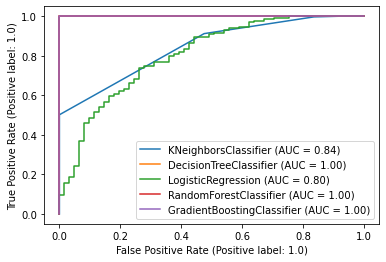

In [103]:
disp=plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC,x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

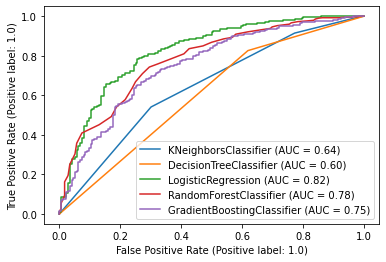

In [104]:
disp=plot_roc_curve(knn,x_train,y_train)
plot_roc_curve(DTC,x_train,y_train,ax=disp.ax_)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(gbdt,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [106]:
auc_score = roc_auc_score(y_test,y_test)
print(auc_score)

1.0


# CV

In [107]:
#Cross validation score 
print('********* Cross Validation Score*********')
print('knn_csv --> ',knn_csv)
print('DTC_csv --> ',DTC_csv)
print('lr_CSV --> ',lr_CSV)
print('SVC_CVS --> ',SVC_CVS)
print('rfc_csv --> ',rfc_csv)
print('gbdt_clf_csv --> ',gbdt_clf_csv)

********* Cross Validation Score*********
knn_csv -->  0.8428571428571429
DTC_csv -->  0.7945578231292517
lr_CSV -->  0.8714285714285716
SVC_CVS -->  0.8564625850340135
rfc_csv -->  0.8625850340136054
gbdt_clf_csv -->  0.8653061224489795


# So we see GradientBoostingClassifier gives the higest cross validation Score so lets tune and see if we can still get the best accuracy for that

# Tunning.

In [110]:
rfc_clf=RandomForestClassifier() 
rfc_clf.fit(x_train,y_train)
pred=rfc_clf.predict(x_train)

In [111]:
rfc_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print('\n==================Train Result=============')
print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{rfc_clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_train,pred)}\n")
#******************* Test SCore**********************
pred=rfc_clf.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print('***********test results***********')
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_test,pred)}\n")
print('Cross validation --> ',rfc_clf_report)


==================Train Result=============
Accuracy Score:88.20%
-----------------------------------------
Classification Report:
                  0.0         1.0  accuracy    macro avg  weighted avg
precision    0.734694    0.896414  0.882033     0.815554      0.870586
recall       0.409091    0.971922  0.882033     0.690507      0.882033
f1-score     0.525547    0.932642  0.882033     0.729095      0.867625
support    176.000000  926.000000  0.882033  1102.000000   1102.000000
----------------------------------
confusion matrix:
[[ 72 104]
 [ 26 900]]

***********test results***********
Accuracy Score:85.87%
-----------------------------------------
Classification Report:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.695652    0.869565  0.858696    0.782609      0.840737
recall      0.262295    0.977199  0.858696    0.619747      0.858696
f1-score    0.380952    0.920245  0.858696    0.650599      0.830852
support    61.000000  307.000000  0.85

In [112]:
from sklearn.model_selection import GridSearchCV

 penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,

I tried to tune bit nothing worked with the data on the above it made the score low and when i tried other changes ended up with error and it gave best accuracy without tunning

In [128]:
print('lr_CSV --> ',lr_CSV)

lr_CSV -->  0.8714285714285716


# so i achieved  87.14% for this model

# saving the model using  pickle

In [140]:
pickle.dump(lr_CSV,open('HR_Analytics.pickle','wb'))

In [141]:
loaded_model=pickle.load(open('HR_Analytics.pickle','rb'))

# NOTE

.

.

.

.

# i have left this heatmap to show you the result of using removing skweness 

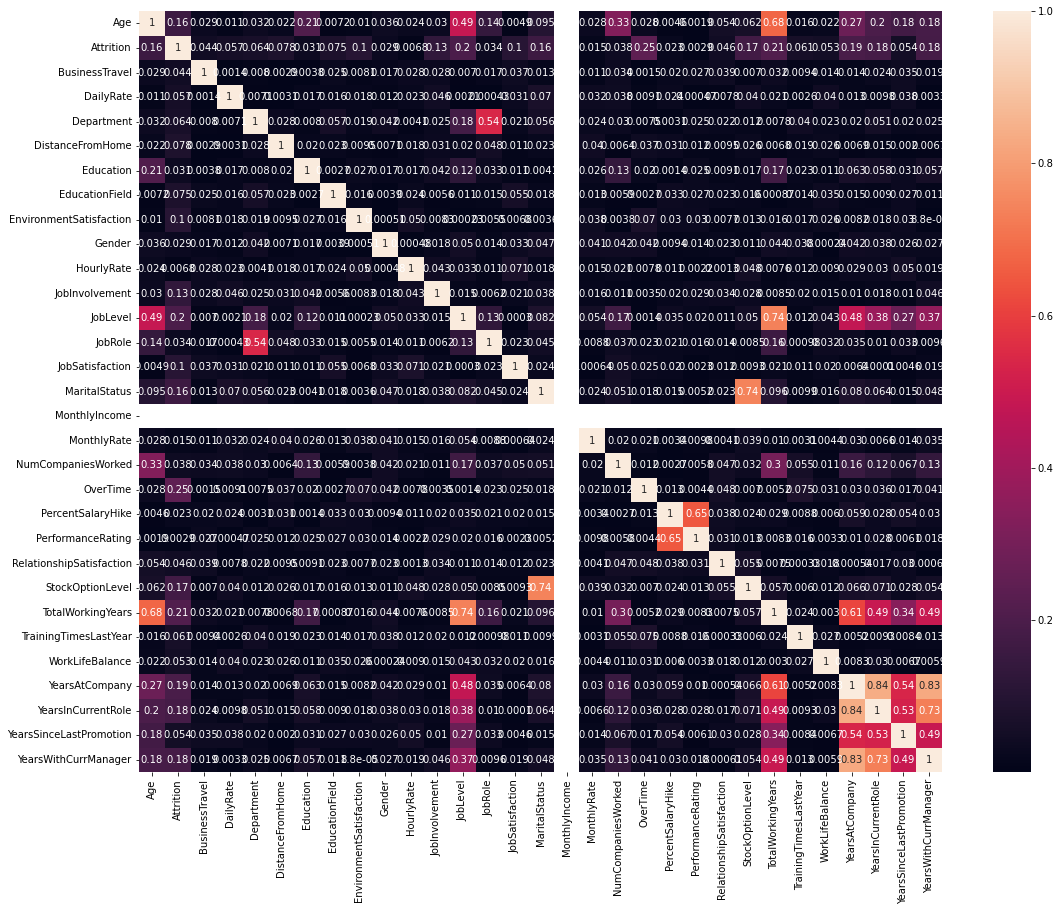

In [227]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()